### For the discussion group today, please prepare to answer the following questions -
#### 1. How many predictors do you have? Are they appropriate for PCA? Will it be useful? Why or why not?
    - 94 predictors after using one hot encoding
    - All predictors are categorical so not appropriate for PCA
    - PCA won't be useful here because all data is categorical so we can't measure correlation and therefore can't use PCA to describe variables
    - 21 predictors without one hot encoding
#### 2. How much variance is each PC accounting for?
#### 3. Can you show us a scree plot?
#### 4. Examine the first PC, get the loadings for each predictor. Does it make sense for certain predictors to vary in the same directions?
#### 5. Can you “name” your first PC? What sort of data is it describing?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('final_mushroom_data.csv',index_col=0)

In [3]:
df.shape

(8124, 95)

In [4]:
df.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,cap-shape_c,cap-shape_f,cap-shape_k,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
df.columns

Index(['class', 'bruises', 'gill-attachment', 'gill-spacing', 'gill-size',
       'stalk-shape', 'ring-number', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_c', 'cap-color_e',
       'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r',
       'cap-color_u', 'cap-color_w', 'cap-color_y', 'odor_c', 'odor_f',
       'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y',
       'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k',
       'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r',
       'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_other', 'stalk-root_r',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-above-ring_y', 'stalk-surface-below-ring_k',
       'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y',
       'stalk-color-above-ring_c', 'sta

In [6]:
#from sklearn.decomposition import PCA

In [7]:
#!pip install mca

In [8]:
#import mca
#multiple correspondence analysis
#similar to factor analysis

In [9]:
#!pip install prince 
#another package for MCA

In [65]:
import pickle 
data=pd.read_pickle('EDAdata.pkl')

In [66]:
data.rename(columns={'cap-shape':'cap_shape', 'cap-surface':'cap_surface', 'cap-color':'cap_color',
       'gill-attachment':'gill_attachment', 'gill-spacing':'gill_spacing', 'gill-size':'gill_size', 'gill-color':'gill_color',
       'stalk-shape':'stalk_shape', 'stalk-root':'stalk_root', 'stalk-surface-above-ring':'stalk_surface_above',
       'stalk-surface-below-ring':'stalk_surface_below', 'stalk-color-above-ring':'stalk_color_above',
       'stalk-color-below-ring':'stalk_color_below', 'veil-color':'veil_color', 'ring-number':'ring_num', 'ring-type':'ring_type',
       'spore-print-color':'spore_color'},inplace=True)

In [40]:
data.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above',
       'stalk_surface_below', 'stalk_color_above', 'stalk_color_below',
       'veil_color', 'ring_num', 'ring_type', 'spore_color', 'population',
       'habitat'],
      dtype='object')

In [86]:
data.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above,stalk_surface_below,stalk_color_above,stalk_color_below,veil_color,ring_num,ring_type,spore_color,population,habitat
0,p,x,s,n,1,p,0,0,1,k,...,s,s,w,w,w,1,p,k,s,u
1,e,x,s,y,1,a,0,0,0,k,...,s,s,w,w,w,1,p,n,n,g
2,e,b,s,w,1,l,0,0,0,n,...,s,s,w,w,w,1,p,n,n,m
3,p,x,y,w,1,p,0,0,1,n,...,s,s,w,w,w,1,p,k,s,u
4,e,x,s,g,0,n,0,1,0,k,...,s,s,w,w,w,1,e,n,a,g


In [67]:
features=data.drop(columns='class')


In [70]:
import prince 
mca=prince.MCA(n_components=21)
mca_components=mca.fit_transform(features)

In [71]:
mcadf=pd.DataFrame(data = mca_components)

In [72]:
mcadf

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.649395,-0.259269,-0.256910,0.040700,0.356407,-0.234944,-0.183926,-0.130280,-0.740650,1.076308,...,-0.434785,0.088826,0.439900,-0.319898,-0.035118,-0.001549,0.245243,-0.322156,-0.024662,0.177188
1,0.624288,-0.502038,0.175630,0.123675,0.374756,0.255927,-0.918322,-0.214987,0.120155,-0.304048,...,-0.558750,0.025601,-0.034488,-0.124927,-0.006222,-0.114317,-0.059869,0.011209,-0.130299,-0.007821
2,0.908374,-0.494800,0.205277,0.112533,0.304684,0.463106,-1.339101,-0.369831,0.573336,-0.228944,...,-0.540859,0.187907,-0.084384,-0.080655,0.007889,-0.103407,-0.090537,0.154927,0.150154,-0.336616
3,0.629982,-0.367607,-0.206734,0.068653,0.224440,-0.174310,-0.229150,-0.118653,-0.706225,1.079801,...,-0.325967,-0.032280,0.394603,-0.165351,0.069237,0.201267,0.134605,-0.419991,0.132533,0.148555
4,0.521233,-0.264821,-0.335433,0.022087,0.732345,-0.520471,0.453582,0.063897,0.133427,-0.353624,...,-0.150935,-0.055444,0.040774,-0.489128,0.097674,-0.067734,-0.000154,0.015346,-0.104620,-0.161823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1.180983,2.176962,1.956110,-1.995294,0.091084,-0.298232,0.113753,0.071574,-0.040016,-0.008395,...,-0.056803,-0.010038,-0.036881,0.020676,-0.109230,0.157223,-0.030689,0.038336,0.313221,1.768412
8120,1.063142,1.914743,1.798928,-2.059414,0.009739,-0.600151,-0.083215,0.019341,-0.000083,0.081169,...,0.036812,-0.007437,-0.124811,0.002024,-0.128225,0.067809,-0.002873,-0.047296,0.529373,0.494042
8121,1.105623,1.741576,1.596747,-1.992251,0.018666,-0.242394,0.129075,-0.058603,-0.192469,-0.074379,...,-0.031279,0.001879,-0.090500,-0.086725,0.130086,0.056323,-0.038711,0.045586,0.254839,1.764723
8122,-0.245419,0.939441,-0.559302,0.146792,0.098008,-0.050922,-0.258280,-0.014741,-0.047047,-0.018432,...,0.068823,-0.014393,0.125598,-0.002565,0.071092,-0.049491,0.095080,0.064852,0.060649,-0.208845


In [73]:
#question 2 #total amount of variability explained by principal components 
mca.eigenvalues_

[0.33969224339465853,
 0.3306899882865702,
 0.292175513118951,
 0.2547841011639029,
 0.21897391284807768,
 0.2034390873017799,
 0.18313350624504965,
 0.1514535701134906,
 0.10856344606789423,
 0.10181893465275779,
 0.09614890241685871,
 0.08909685814971709,
 0.08627715563625617,
 0.07202316268550965,
 0.06838553693920846,
 0.05901577867426751,
 0.057387318237216385,
 0.05625721664568455,
 0.05510869175636019,
 0.04862520943903756,
 0.04759465290966301]

In [74]:
mca.total_inertia_

4.523809523809524

In [84]:
mca.explained_inertia_

[0.07508986432934557,
 0.07309989214755762,
 0.06458616605787339,
 0.056320696046757476,
 0.048404759682206644,
 0.04497074561407766,
 0.040482143485747815,
 0.03347921023561371,
 0.023998235446587145,
 0.022507343449556984,
 0.02125396790267403,
 0.019695094959411148,
 0.01907179229854084,
 0.015920909646270555,
 0.015116802902351343,
 0.013045593180627554,
 0.012685617715595201,
 0.012435805784835533,
 0.012181921335616464,
 0.010748730507576723,
 0.010520923274767613]

Text(0, 0.5, 'proportion of explained variance')

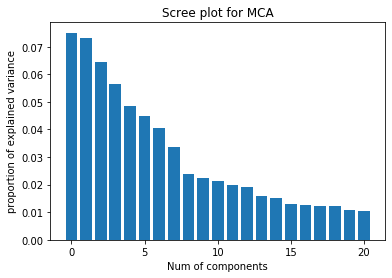

In [85]:
#Question 3?
index = np.arange(21)
plt.bar(index, mca.explained_inertia_)
plt.title('Scree plot for MCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

In [82]:
mca.components_[0] #loading of MC1? 

AttributeError: 'MCA' object has no attribute 'components_'